<a href="https://colab.research.google.com/github/wangechi-wq/Housepriceprediction/blob/main/House_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

## a) Specifying the Question

Studying the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.Afterwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## b) Defining the Metric for Success

Creating and determining the model that will give the most accurate prediction for the prices of the houses.

## c) Understanding the context

Hass real estate company would like to identifying the factors that influence the prices of houses which is vital for the company. This will help the company know which properties customers look at most when purchasing a house.

## d) Recording the Experimental Design

The following are the experimental design i took in order to complete this project:

1. Importing all the necessary libraries
2. Loading the dataset
3. Reading, cleaning the dataset
Performing:
4. Exploratory Data Analysis
5. Multiple Linear Regression
6. Quantile Regression
7. Ridge Regression
8. Lasso Regression
9. Elastic Net Regression

## e) Data Relevance

# 2.Reading the Data

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading data
housing = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")
#Previewing the top of the dataset
housing.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
#Previewing the bottom of the dataset
housing.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# 3.Checking the Data

In [ ]:
housing.shape

(21613, 20)

The dataset contains 21613 rows and 20 columns

In [ ]:
#checking the datatypes
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Identifying the Missing Data
#
housing.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#checking for duplicates in the fifa dataset
housing.duplicated().sum()

3

There some 3 duplicates that should be dropped during data cleaning.

# 5.Data Cleaning

In [ ]:
#dropping duplicates
housing.drop_duplicates(subset = None, keep = 'first', inplace = True)
housing.shape

(21610, 20)

In [ ]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

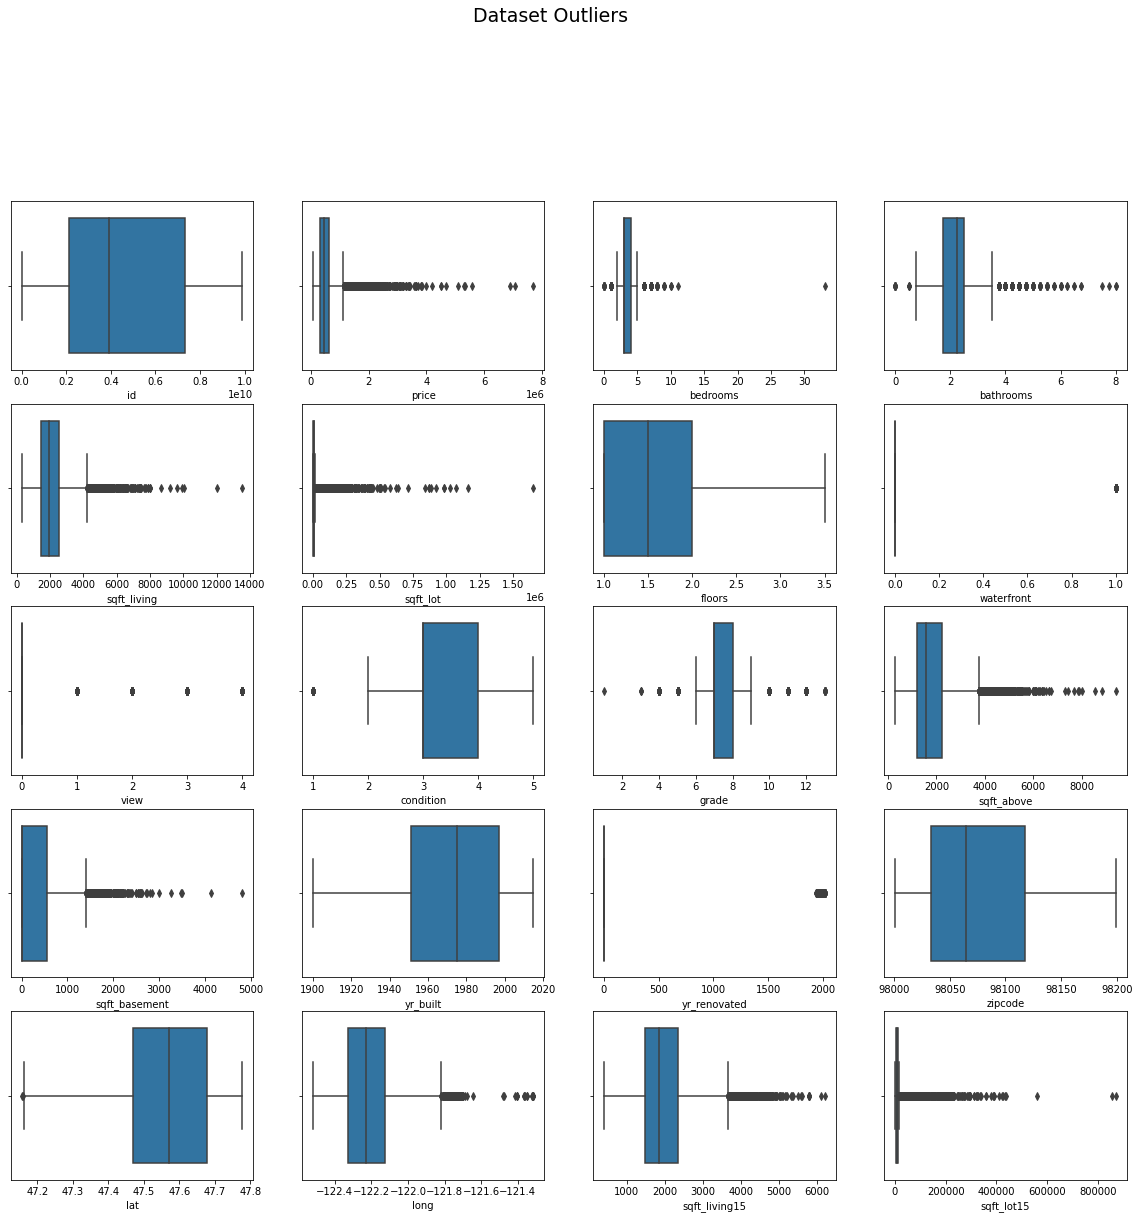

In [ ]:
#checking for outliers
fig, axes = plt.subplots(nrows =5, ncols = 4, figsize = (20, 18))

colum = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
plt.suptitle('Dataset Outliers', y = 1.03, fontsize = 19)
for ax, data, colum  in zip(axes.flatten(), housing, colum):
    sns.boxplot(housing[colum], ax = ax)
plt.show()

There is presence of outliers which need to be removed to improve accuracy of the results during modelling.

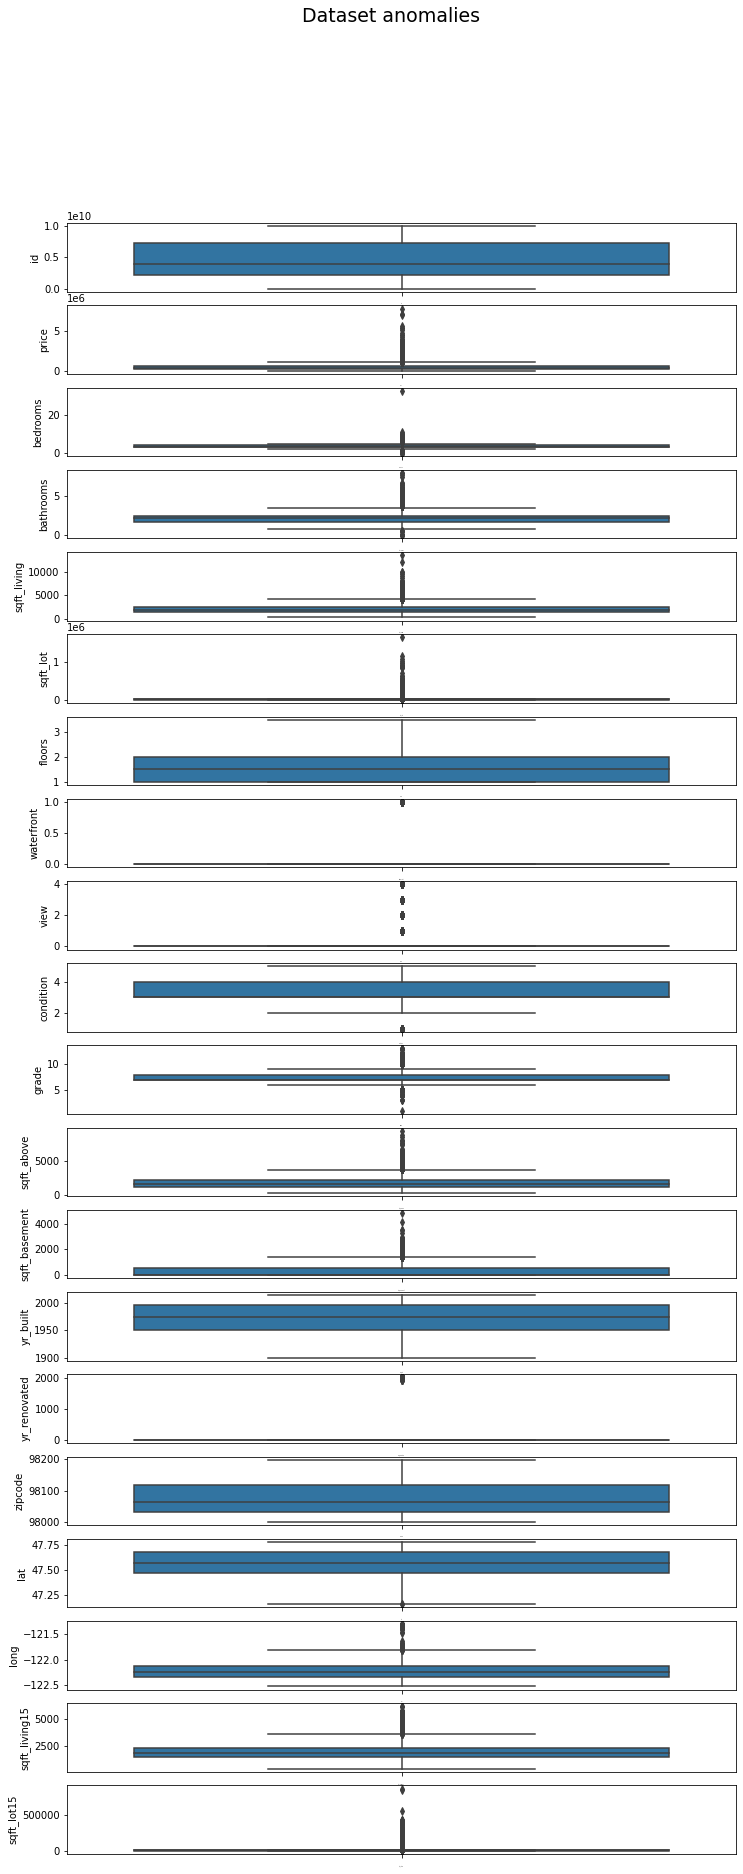

In [ ]:
# checking for anomalies
anomalies = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
       
fig, ax = plt.subplots(len(anomalies), figsize=(12,30))

for i, col_val in enumerate(anomalies):

    sns.boxplot(y=housing[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=1)
    plt.suptitle('Dataset anomalies', fontsize = 19)

In [ ]:
# dealing with outliers
# quantiles
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
housing1 = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(housing1.shape)

(14935, 20)


# 6.Exploratory Data Analysis

## a) Univariate Analysis

In [ ]:
#checking descriptive statistics of the fifa dataset
housing1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.493500e+04,1.493500e+04,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.0,14935.0,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000,14935.0,14935.000000,14935.000000,14935.000000,14935.000000,14935.000000
mean,4.729214e+09,4.386582e+05,3.262337,1.972179,1814.293940,6988.896150,1.471342,0.0,0.0,3.420623,7.380516,1585.198594,229.095347,1971.708604,0.0,98079.765383,47.558906,-122.230169,1796.942819,6868.331034
std,2.851519e+09,1.805742e+05,0.772942,0.646058,614.767257,3355.737263,0.547908,0.0,0.0,0.647318,0.805205,601.524228,353.371132,29.252941,0.0,53.477499,0.142091,0.123688,507.449152,2987.774641
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,47.189500,-122.472000,620.000000,651.000000
25%,2.321300e+09,3.000000e+05,3.000000,1.500000,1350.000000,4690.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1952.000000,0.0,98033.000000,47.457600,-122.333000,1430.000000,4800.000000
50%,4.037800e+09,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1974.000000,0.0,98072.000000,47.569700,-122.264000,1710.000000,7172.000000
75%,7.453500e+09,5.475000e+05,4.000000,2.500000,2210.000000,8925.000000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,450.000000,1999.000000,0.0,98118.000000,47.683500,-122.153000,2090.500000,8649.500000
max,9.900000e+09,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,47.777600,-121.821000,3640.000000,17550.000000


In [ ]:
# Finding the measures of central tendencies

for column in anomalies:
  print('\n')

  print(column + ', Variance: '+ str(housing1[column].var()))
  print(column + ', Skewness: '+ str(housing1[column].skew()))
  print(column + ', Kurtosis: '+ str(housing1[column].kurt()))



id, Variance: 8.131160749401013e+18
id, Skewness: 0.1867830246326962
id, Kurtosis: -1.2752332017807446


price, Variance: 32607040353.144436
price, Skewness: 0.8421013703791459
price, Kurtosis: 0.44551300889583967


bedrooms, Variance: 0.5974396977320987
bedrooms, Skewness: 0.24255682126424405
bedrooms, Kurtosis: -0.2732799106297472


bathrooms, Variance: 0.4173908905242536
bathrooms, Skewness: -0.09339535678575986
bathrooms, Kurtosis: -0.8167482245769908


sqft_living, Variance: 377938.7806081155
sqft_living, Skewness: 0.5487260208626119
sqft_living, Kurtosis: -0.09451260097885816


sqft_lot, Variance: 11260972.580147898
sqft_lot, Skewness: 0.5288268536365436
sqft_lot, Kurtosis: 0.4895734320795717


floors, Variance: 0.30020319962462666
floors, Skewness: 0.772488420533572
floors, Kurtosis: -0.21932982033928772


waterfront, Variance: 0.0
waterfront, Skewness: 0
waterfront, Kurtosis: 0


view, Variance: 0.0
view, Skewness: 0
view, Kurtosis: 0


condition, Variance: 0.4190202363000934

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f544e041690>,
      dtype=object)

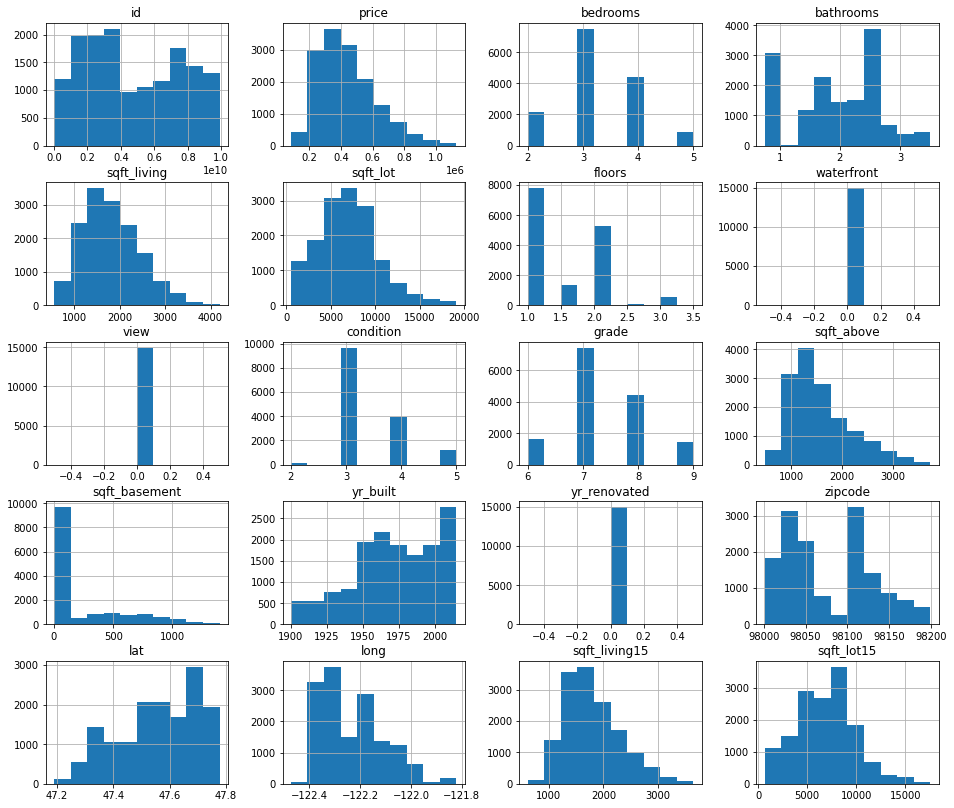

In [ ]:
#Checking for the data if its normally distributed
housing1.hist(bins=10, figsize=[16,14])

The distribution is not normal

In [ ]:
#frequency table for bedrooms variable to show how which number of bedrooms per house is most common

housing1.bedrooms.value_counts()

3    7508
4    4411
2    2175
5     841
Name: bedrooms, dtype: int64

According to our frequency table 3 bedroom house  has the highest number of records i.e 7508 whereas 5 bedroom house has the least number of records i.e 841.

plotting the observations below using a barchart

Text(0.5, 1.0, 'Bargraph representing no.of bedrooms in a house')

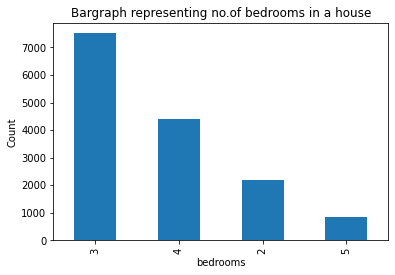

In [ ]:
# Plotting the variable bedrooms into a bar chart
housing1['bedrooms'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("bedrooms")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Bargraph representing no.of bedrooms in a house")


In [ ]:
housing1.grade.value_counts()

7    7428
8    4426
6    1635
9    1446
Name: grade, dtype: int64

grade 7 has the highest number of records i.e. 7428 while grade 9 has the least number of records i.e. 1446

In [ ]:
#frequency table for floors variable to show how which number of floors of a house is most common

housing1.floors.value_counts()

1.0    7792
2.0    5255
1.5    1308
3.0     511
2.5      64
3.5       5
Name: floors, dtype: int64

According to our frequency table 1 floored-house has the highest number of records i.e 7792 whereas 3.5 floor house has the least number of records i.e 5. 

plotting the observations below using a barchart

Text(0.5, 1.0, 'Bargraph representing no.of floors in a house')

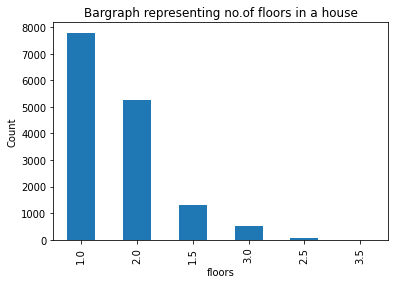

In [ ]:
# Plotting the variable floors into a bar chart
housing1['floors'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("floors")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Bargraph representing no.of floors in a house")

The more the floors the lesser the occupants

## b) Bivariate Analysis

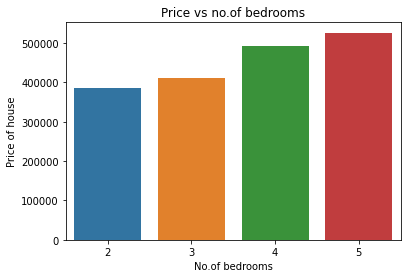

In [ ]:
# plotting of price vs bedrooms

ax = sns.barplot(x = 'bedrooms', y = 'price', data=housing1, ci=None, estimator=np.mean)
ax.set(xlabel='No.of bedrooms',
       ylabel='Price of house',
       title='Price vs no.of bedrooms')
plt.show()

From the observations, a 2-bedroomed house is the cheapest while a 5-bedroomed house is the most expensive. Price increases as the no.of bedrooms increases

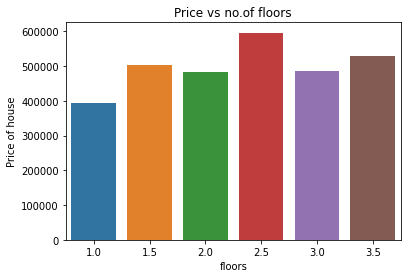

In [ ]:
# plotting of price vs floors

ax = sns.barplot(x = 'floors', y = 'price', data=housing1, ci=None, estimator=np.mean)
ax.set(xlabel='floors',
       ylabel='Price of house',
       title='Price vs no.of floors')
plt.show()

from the output, a house with 2.5 no.of  floors is the most expensive followed by 3.5 no.of floors and 1.5. A house with 1 floor is the cheapest

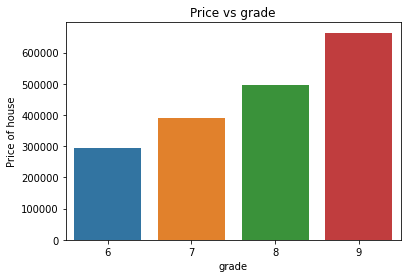

In [ ]:
# plotting of price vs grade

ax = sns.barplot(x = 'grade', y = 'price', data=housing1, ci=None, estimator=np.mean)
ax.set(xlabel='grade',
       ylabel='Price of house',
       title='Price vs grade')
plt.show()

grade 9 is the most expensive while grade six is the least expensive

In [ ]:
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


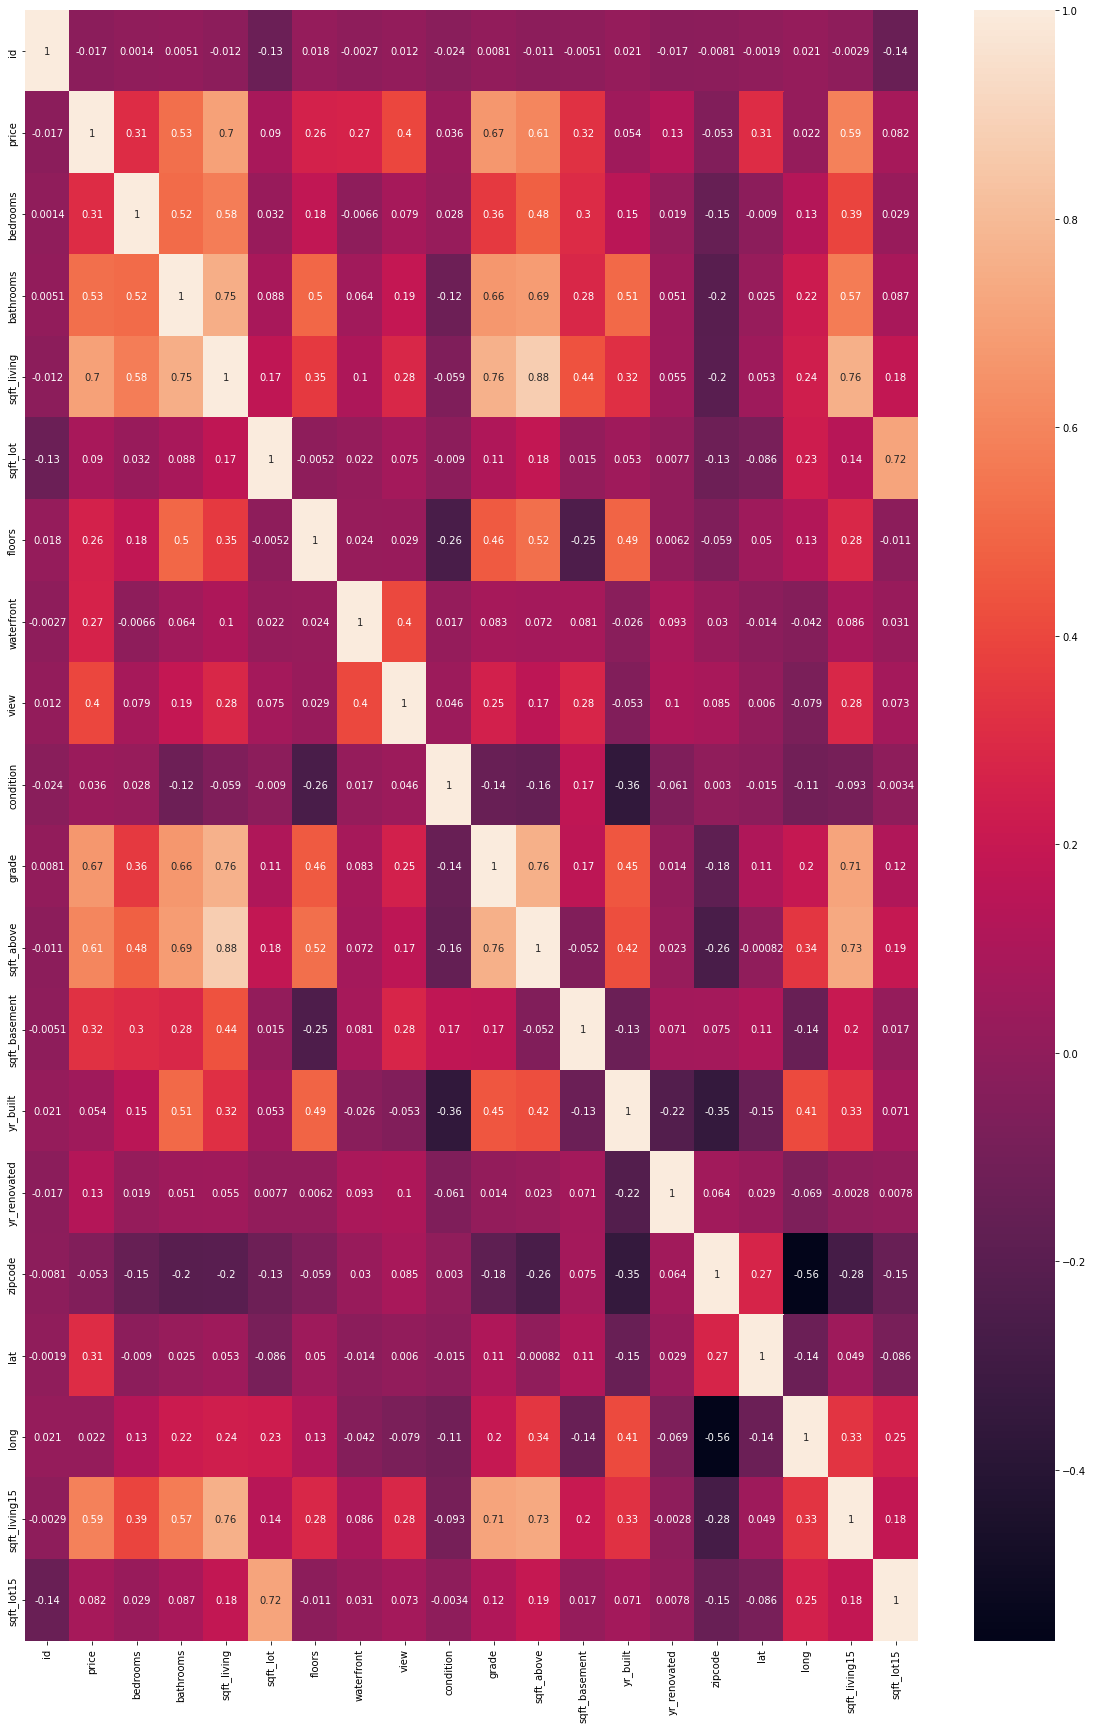

In [ ]:
# Plotting correlation using a heatmap
fig,ax = plt.subplots(figsize=(20, 30))
sns.heatmap(housing.corr(),annot=True)
plt.show()

## c) Multivariate Analysis

we will use pca method

In [ ]:
#Separating features and labels /preprocessing
X = housing1[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']].values
y = housing1['price']

In [ ]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11948, 11)
(2987, 11)
(11948,)
(2987,)


In [ ]:
#standardizing the variables.
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
# Implementing PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# checking the explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.69581117e-01, 1.68470272e-01, 1.17833769e-01, 7.79150191e-02,
       6.82802972e-02, 3.83886997e-02, 3.12640634e-02, 2.82667627e-02,
       6.19689287e-33, 1.73831025e-34, 1.46917893e-36])

# 7.Implementing the Solution

Performing a normality test usinng shapiro

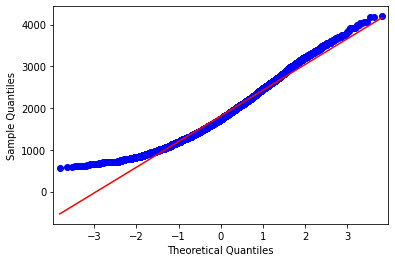

Statistics=0.9755, p=0.0000
Sample does not look Gaussian


In [ ]:
#Q-Q Plot for sqft_living
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

qqplot(housing1['sqft_living'], line='s')
pyplot.show()
stat, p = shapiro(housing1['sqft_living'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

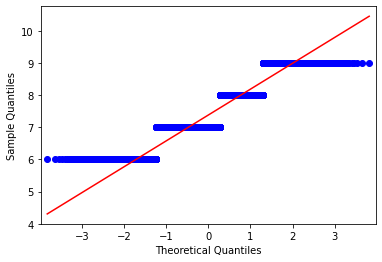

Statistics=0.8522, p=0.0000
Sample does not look Gaussian


In [ ]:
#Q-Q Plot for grade var

qqplot(housing1['grade'], line='s')
pyplot.show()
stat, p = shapiro(housing1['grade'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

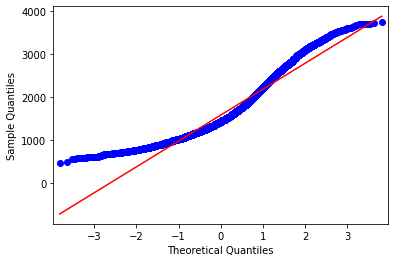

Statistics=0.9264, p=0.0000
Sample does not look Gaussian


In [ ]:
#Q-Q Plot for sqft_above var

qqplot(housing1['sqft_above'], line='s')
pyplot.show()
stat, p = shapiro(housing1['sqft_above'])
print('Statistics=%.4f, p=%.4f' %(stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

# Regression Analysis

## a) Multiple Linear Regression

In [ ]:
check = housing[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']]
  # Let's display the correlations between the variables
correlations = check.corr()

correlations

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,lat
bedrooms,1.000000,0.515935,0.576674,0.175448,-0.006583,0.079433,0.357003,0.477619,0.303077,0.391633,-0.008953
bathrooms,0.515935,1.000000,0.754688,0.500669,0.063747,0.187891,0.664990,0.685351,0.283814,0.568665,0.024590
sqft_living,0.576674,0.754688,1.000000,0.353954,0.103820,0.284641,0.762719,0.876600,0.435054,0.756420,0.052521
floors,0.175448,0.500669,0.353954,1.000000,0.023711,0.029325,0.458151,0.523874,-0.245673,0.279861,0.049593
waterfront,-0.006583,0.063747,0.103820,0.023711,1.000000,0.401993,0.082785,0.072080,0.080585,0.086469,-0.014272
view,0.079433,0.187891,0.284641,0.029325,0.401993,1.000000,0.251378,0.167659,0.276996,0.280404,0.006049
grade,0.357003,0.664990,0.762719,0.458151,0.082785,0.251378,1.000000,0.755919,0.168443,0.713208,0.114086
sqft_above,0.477619,0.685351,0.876600,0.523874,0.072080,0.167659,0.755919,1.000000,-0.051923,0.731870,-0.000823
sqft_basement,0.303077,0.283814,0.435054,-0.245673,0.080585,0.276996,0.168443,-0.051923,1.000000,0.200367,0.110535
sqft_living15,0.391633,0.568665,0.756420,0.279861,0.086469,0.280404,0.713208,0.731870,0.200367,1.000000,0.048839


from the table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. 

Checking Multicolinearity

In [ ]:
#computing the vif score for the variables
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,lat
bedrooms,1.620031,-0.409574,2.496368e-01,0.079398,0.062697,0.111656,0.330329,-1.094614e+00,-6.309615e-01,0.026876,0.036489
bathrooms,-0.409574,2.937329,-1.468235e+00,-0.849848,-0.000706,0.058091,-0.502793,2.426159e-01,-2.151566e-01,0.039724,0.122913
sqft_living,0.260997,-1.413947,2.247350e+14,-0.054518,0.315086,-0.874692,2.418306,-2.026257e+14,-1.082928e+14,2.189334,-0.348254
floors,0.079398,-0.849848,-1.069509e-02,1.841087,-0.008243,-0.023114,-0.386562,-3.285951e-01,6.705758e-01,0.336328,-0.116301
waterfront,0.062697,-0.000706,3.125282e-01,-0.008243,1.199201,-0.495010,0.043849,-3.890795e-01,-1.577881e-01,0.060600,0.013813
view,0.111656,0.058091,-8.819556e-01,-0.023114,-0.495010,1.376463,-0.146765,7.920235e-01,9.616305e-02,-0.240368,0.050325
grade,0.330329,-0.502793,2.319391e+00,-0.386562,0.043849,-0.146765,3.194724,-3.495544e+00,-1.547809e+00,-0.851574,-0.240610
sqft_above,-1.088542,0.195842,-2.026257e+14,-0.285614,-0.390523,0.782258,-3.583805,1.826915e+14,9.763902e+13,-3.566195,0.448920
sqft_basement,-0.626353,-0.245883,-1.082928e+14,0.695976,-0.158760,0.091086,-1.594345,9.763902e+13,5.218293e+13,-1.425243,0.012748
sqft_living15,0.026876,0.039724,2.229770e+00,0.336328,0.060600,-0.240368,-0.851574,-3.602654e+00,-1.444728e+00,2.782472,-0.014219


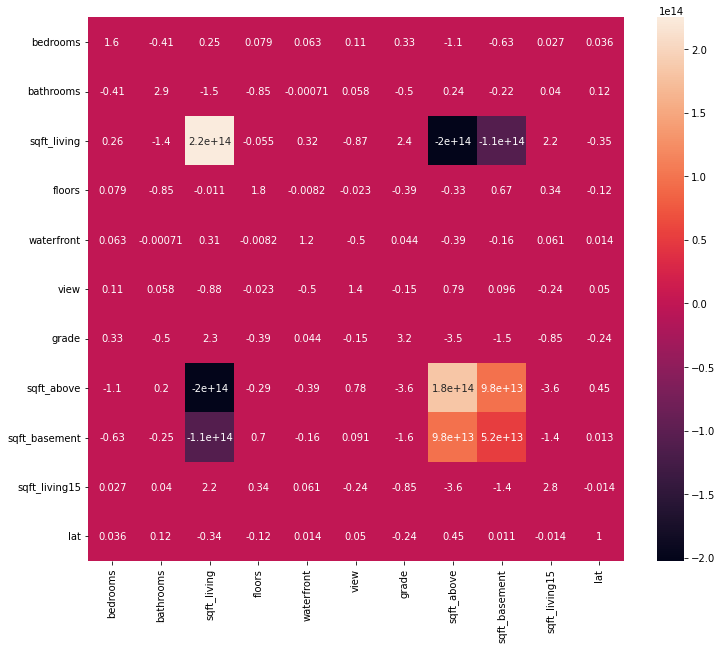

In [ ]:
#visualizing the vif using a heatmap

plt.figure(figsize = (12, 10))
sns.heatmap(vif, annot = True)
plt.show()

In [ ]:
#Separating features and labels /preprocessing
X = housing1[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']].values
y = housing1['price']

In [ ]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making Predictions
 
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 87497.52154875983
Mean Squared Error: 13765354568.589
Root Mean Squared Error: 117325.8478281278


In [ ]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

1577.7446589566703

Residual plot for the values

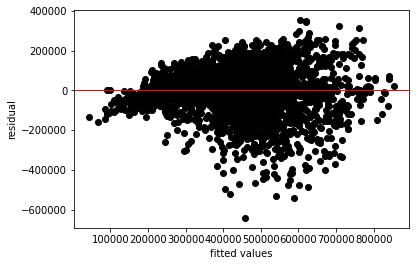

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

the residuals are centered around a mean that is very close to 0

In [ ]:
#let's evaluate the performance of a linear regression model using r-squared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.5726689477690214

In [ ]:
# # Performing the barlett's test


import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

3599.1957908132076
the variances are homogeneous!


## b) Quantile Regression

In [ ]:
quant = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']

for i,colval in enumerate(quant):
  X_quant = np.array(housing1[colval].values.reshape(-1,1))
  y_quant = np.array(housing1['price'])

 # We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_quant_train, X_quant_test, y_quant_train, y_quant_test = train_test_split(X_quant, y_quant, test_size=0.2, random_state=10)
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y_quant ~ X_quant', housing1)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                y_quant   Pseudo R-squared:               0.1680
Model:                       QuantReg   Bandwidth:                   2.722e+04
Method:                 Least Squares   Sparsity:                    3.268e+05
Date:                Fri, 11 Feb 2022   No. Observations:                14935
Time:                        16:42:45   Df Residuals:                    14933
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.746e+07   4.48e+05    -61.371      0.000   -2.83e+07   -2.66e+07
X_quant     5.861e+05   9409.708     62.289      0.000    5.68e+05    6.05e+05

The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
quantile = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantile: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X_quant']] + res.conf_int().loc['X_quant'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

    qt     intercept        x_coef  cf_lower_bound  cf_upper_bound
0  0.1 -1.596010e+07  3.412218e+05    3.237200e+05    3.587236e+05
1  0.2 -1.899291e+07  4.059041e+05    3.896120e+05    4.221961e+05
2  0.3 -2.160825e+07  4.615982e+05    4.457577e+05    4.774386e+05
3  0.4 -2.434667e+07  5.198441e+05    5.031005e+05    5.365876e+05
4  0.5 -2.746476e+07  5.861183e+05    5.676741e+05    6.045624e+05
5  0.6 -3.157611e+07  6.734007e+05    6.539000e+05    6.929014e+05
6  0.7 -3.673835e+07  7.829408e+05    7.597643e+05    8.061173e+05
7  0.8 -4.302124e+07  9.163498e+05    8.893946e+05    9.433050e+05
8  0.9 -5.096186e+07  1.085158e+06    1.053655e+06    1.116662e+06


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


Mean squared error: 24762293916.00
Variance score: 0.24


Text(0.5, 1.0, 'predictors of price')

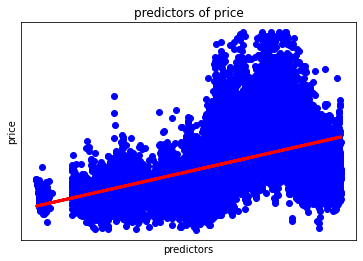

In [ ]:
## Let's now trying to fit a linear regression

mode = LinearRegression(fit_intercept = True, normalize = False)
mode.fit(X_quant,y_quant)

y_quant_predict = mode.predict(X_quant)


print("Mean squared error: {0:.2f}"
    .format(np.mean((y_quant_predict - y_quant) ** 2)))
print('Variance score: {0:.2f}'.format(mode.score(X_quant, y_quant)))

# With a low variance score of 0.50, it means that our linear regression 
# did not do a good job. 
plt.figure(2)
plt.scatter(X_quant, y_quant,  color='blue')
plt.plot(X_quant, y_quant_predict, color='red',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("predictors")
plt.ylabel("price")
plt.title("predictors of price")

The variance score is quite low

<Figure size 432x288 with 0 Axes>

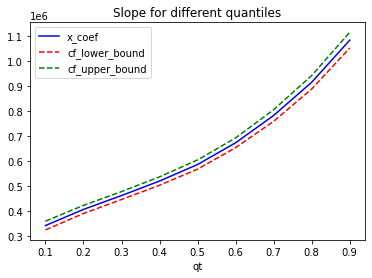

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])

plt.show()

The Mean squared error of our quantile regression is 24762293916.00 which is higher than our linear regression 13765354568.589. Hence our linear model performed better than our quantile model

## c) Ridge Regression

In [ ]:
# Importing our libraries
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
X_ridge = housing1[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']].values
y_ridge = housing1['price']

In [ ]:
# Splitting the dataset into training and testing sets
#
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge,y_ridge, test_size = 0.2, random_state = 10)
scale = StandardScaler()
x = scale.fit_transform(X_ridge_train)

In [ ]:
# determining the most appropriate value for the l2 regularization.
 
ridg = Ridge(normalize=True)
searching = GridSearchCV(estimator=ridg,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
searching.fit(X_ridge_train,y_ridge_train)
print(searching.best_params_)
abs(searching.best_score_)

{'alpha': 0.001}


13967457426.77558

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the
# mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_ridge_train,y_ridge_train)
ridg_model = (mean_squared_error(y_true=y_ridge_train,y_pred=ridge.predict(X_ridge_train)))
print(ridg_model)

13944491521.83972


The ridge regression model gives us a mean squared error of 13944491521.83972 with an alpha of 0.001 but our best score was 13967457426.77558 which performed better than linear and quantile regression

## d) Lasso Regression

In [ ]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [ ]:
X_lasso = housing1[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']].values
y_lasso = housing1['price']

In [ ]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X_lasso)
x_scale = scaler.transform(X_lasso)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_lasso, y_lasso) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X_lasso, y_lasso)) 
print("lasso MSE:", mean_squared_error(y_lasso, lasso.predict(X_lasso))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.5739894043661292
lasso MSE: 13890014589.317215
lasso coef: [-5.54665881e+03 -1.97356997e+04  1.46901808e+02  7.86172515e+03
  0.00000000e+00  0.00000000e+00  6.21835831e+04 -5.47243508e+01
 -2.55260037e+01  3.75318322e+01  6.00025993e+05]


In [ ]:
from sklearn.model_selection import GridSearchCV


X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y_lasso, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_lasso_train, y_lasso_train) 
linear.fit(X_lasso_train, y_lasso_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_lasso_test, y_lasso_test))
print("linear score:", linear.score(X_lasso_test, y_lasso_test)) 
print("lasso MSE:", mean_squared_error(y_lasso_test, gridlasso.predict(X_lasso_test)))
print("linear MSE:", mean_squared_error(y_lasso_test, linear.predict(X_lasso_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.564734979648017
linear score: 0.5646239063155363
lasso MSE: 14500958625.238535
linear MSE: 14504659059.969923
lasso best estimator coef: [-5.16471608e+03 -2.16412387e+04  1.46523177e+02  1.11908933e+04
  0.00000000e+00  0.00000000e+00  6.13252541e+04 -5.58512331e+01
 -2.39449633e+01  3.81992330e+01  6.01023135e+05]
linear coef: [-5.75179458e+03 -2.15140612e+04 -9.84061777e+14  1.15257350e+04
  3.00947800e+08 -2.11785712e+08  6.13563985e+04  9.84061777e+14
  9.84061777e+14  3.80662551e+01  6.01048092e+05]


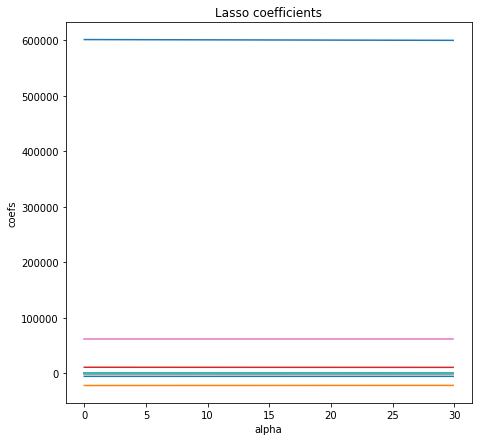

In [ ]:
coefsLasso = [] 

# Building Lasso for 300 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 30, 0.1) 
for i in range(300):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_lasso_train, y_lasso_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


Lasso has reduced most coeficients to zero 

The lasso regression model gives a mean squared error of 13944491521.83972 which is slightly higher compared to ridge regression.

## e) Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
elas_search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
X_elast = housing1[['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement','sqft_living15','lat']]
y_elast = housing1['price']

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
elas_search.fit(X_elast,y_elast)
elas_search.best_params_
abs(elas_search.best_score_)

13935059126.475891

In [ ]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X_elast,y_elast)
second_model=(mean_squared_error(y_true=y_elast,y_pred=elastic.predict(X_elast)))
print(second_model)

22069742161.789482


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X_elast.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 9759.928361672093,
 'bedrooms': 5293.4662546355075,
 'floors': 8165.707898572751,
 'grade': 17646.277998609392,
 'lat': 132488.7896114823,
 'sqft_above': 14.806645028914177,
 'sqft_basement': 18.520703934171316,
 'sqft_living': 20.294872185452256,
 'sqft_living15': 21.2979203797414,
 'view': 0.0,
 'waterfront': 0.0}

The coeficients for the different variables are varying

# 8.Challenging the solution

Conclusion


From the above analysis we conclude that ridge regression model performed better than all the other models implemented.
I would recommend Ridge model for the analysis and prediction of house prices for Hass company.